In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)




In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)





630

In [5]:
#Generate dataframe 
url = "http://api.openweathermap.org/data/2.5/weather?"

full_url = url + "appid=" + weather_api_key + "&q=" 
updated_cities = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0


print("Beginning Data Retrieval")
print("-" * 25)

for city in cities:
    query_url = full_url + city
    response = requests.get(query_url).json()
    time.sleep(2)
    count += 1
    
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_fah = ((response["main"]["temp_max"] - 273.15) * 9/5) + 32
        max_temp.append(temp_fah)
        wind_mph = response["wind"]["speed"] * 2.237
        wind_speed.append(wind_mph)
        updated_cities.append(city)

        print(f"Processing Record {count}")
    except:
        print("City not found. Skipping...")
        pass

print("-" * 25)   
print("Data Retrieval Complete")
print("-" * 25)
    
    


Beginning Data Retrieval
-------------------------
Processing Record 1
Processing Record 2
Processing Record 3
Processing Record 4
Processing Record 5
City not found. Skipping...
Processing Record 7
Processing Record 8
Processing Record 9
Processing Record 10
Processing Record 11
Processing Record 12
Processing Record 13
Processing Record 14
Processing Record 15
Processing Record 16
Processing Record 17
Processing Record 18
Processing Record 19
Processing Record 20
Processing Record 21
Processing Record 22
Processing Record 23
Processing Record 24
Processing Record 25
Processing Record 26
Processing Record 27
Processing Record 28
Processing Record 29
City not found. Skipping...
Processing Record 31
Processing Record 32
Processing Record 33
Processing Record 34
Processing Record 35
Processing Record 36
Processing Record 37
Processing Record 38
Processing Record 39
Processing Record 40
City not found. Skipping...
Processing Record 42
Processing Record 43
Processing Record 44
Processing R

Processing Record 367
Processing Record 368
Processing Record 369
Processing Record 370
Processing Record 371
Processing Record 372
Processing Record 373
Processing Record 374
Processing Record 375
Processing Record 376
Processing Record 377
Processing Record 378
Processing Record 379
Processing Record 380
Processing Record 381
Processing Record 382
Processing Record 383
Processing Record 384
Processing Record 385
Processing Record 386
Processing Record 387
Processing Record 388
Processing Record 389
Processing Record 390
Processing Record 391
Processing Record 392
Processing Record 393
Processing Record 394
Processing Record 395
Processing Record 396
Processing Record 397
Processing Record 398
Processing Record 399
Processing Record 400
Processing Record 401
Processing Record 402
Processing Record 403
Processing Record 404
Processing Record 405
Processing Record 406
Processing Record 407
Processing Record 408
Processing Record 409
Processing Record 410
Processing Record 411
Processing

In [8]:
# DataFrame Table

df = pd.DataFrame({"City": updated_cities, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lng, "Max Temp":  max_temp, "Wind Speed": wind_speed})

df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,khatanga,100,RU,1584230511,86,71.97,102.50,26.078,9.66384
1,korla,100,CN,1584230799,40,41.76,86.15,29.282,1.78960
2,havre-saint-pierre,40,CA,1584230801,63,50.23,-63.60,26.600,12.75090
3,morden,90,CA,1584230805,72,49.19,-98.10,15.998,9.17170
4,durban,65,ZA,1584230784,88,-29.86,31.03,77.000,2.23700
...,...,...,...,...,...,...,...,...,...
572,juegang,0,CN,1584232161,58,32.32,121.19,55.004,12.23639
573,matara,21,LK,1584232163,91,5.95,80.54,71.978,5.50302
574,kalaleh,40,IR,1584232165,93,37.38,55.49,50.000,6.93470
575,bambanglipuro,13,ID,1584232136,85,-7.95,110.28,78.116,2.95284


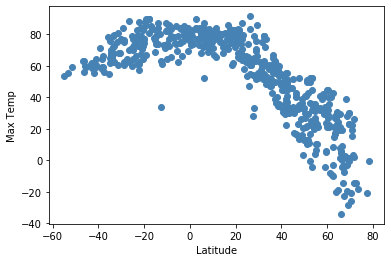

In [10]:
# Scatter Plot for Latitude and Max Temp



plt.scatter(df["Lat"], df["Max Temp"], color = "steelblue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()



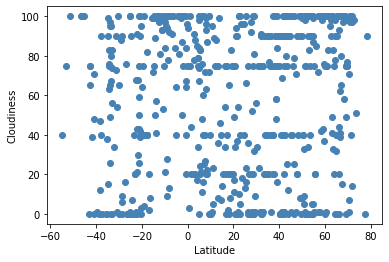

In [11]:
# Scatter Plot for Latitude and Cloudiness


plt.scatter(df["Lat"], df["Cloudiness"], color = "steelblue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()


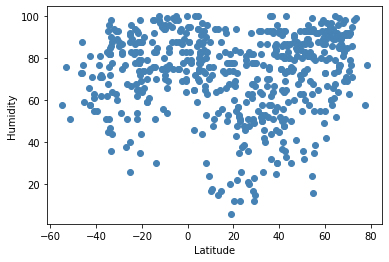

In [12]:
#Scatter Plot for Latitude and Humidity


plt.scatter(df["Lat"], df["Humidity"], color = "steelblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

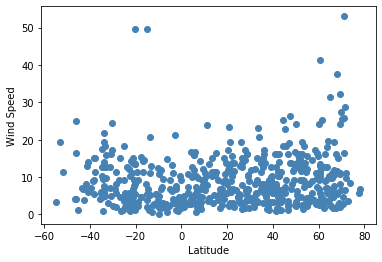

In [13]:
#Scatter Plot for Latitude and Wind Speed

plt.scatter(df["Lat"], df["Wind Speed"], color = "steelblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

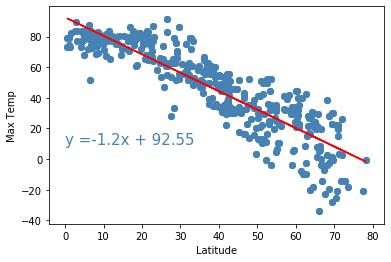

In [43]:
#North Lat vs. Max Temp
north_temp = df.loc[df["Lat"] >= 0, ["Lat", "Max Temp"]]
x_values = north_temp["Lat"]
y_values = north_temp["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="steelblue")
plt.scatter(x_values,y_values, color="steelblue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()



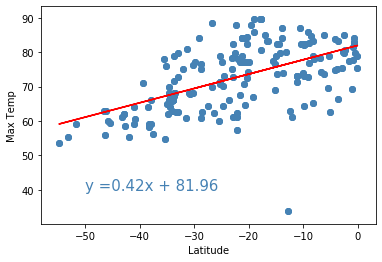

In [27]:
#Southern Lat vs. Max Temp

south_temp = df.loc[df["Lat"] < 0, ["Lat", "Max Temp"]]
x_values = south_temp["Lat"]
y_values = south_temp["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="steelblue")
plt.scatter(x_values,y_values, color="steelblue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()


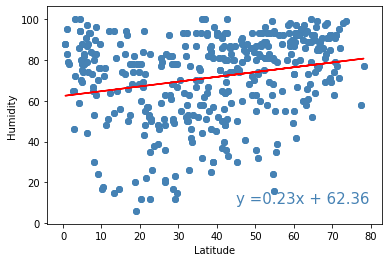

In [25]:
#Northern Lat vs. Humidity
north_humidity = df.loc[df["Lat"] >= 0, ["Lat", "Humidity"]]
x_values = north_humidity["Lat"]
y_values = north_humidity["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="steelblue")
plt.scatter(x_values,y_values, color="steelblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()


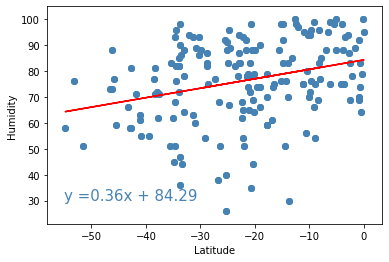

In [32]:
#Southern Lat vs. Humidity
south_humidity = df.loc[df["Lat"] < 0, ["Lat", "Humidity"]]
x_values = south_humidity["Lat"]
y_values = south_humidity["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="steelblue")
plt.scatter(x_values,y_values, color="steelblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()


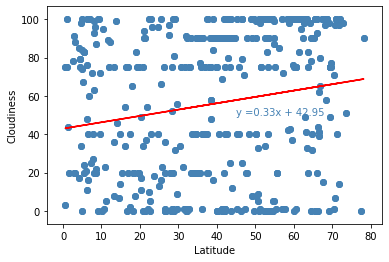

In [35]:
#Northern Lat vs. Cloudiness
north_cloudiness = df.loc[df["Lat"] >= 0, ["Lat", "Cloudiness"]]
x_values = north_cloudiness["Lat"]
y_values = north_cloudiness["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=10,color="steelblue")
plt.scatter(x_values,y_values, color="steelblue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()


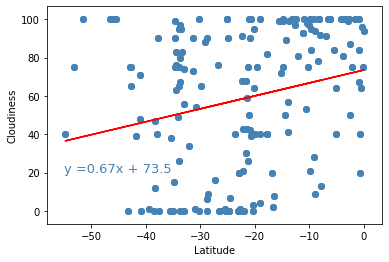

In [40]:
#Southern Lat vs. Cloudiness
south_cloudiness = df.loc[df["Lat"] < 0, ["Lat", "Cloudiness"]]
x_values = south_cloudiness["Lat"]
y_values = south_cloudiness["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=13,color="steelblue")
plt.scatter(x_values,y_values, color="steelblue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()


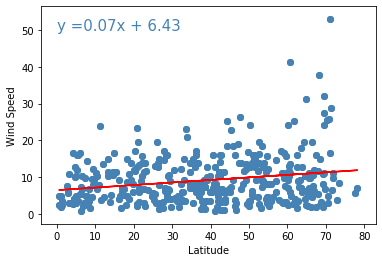

In [41]:
#Northern Lat vs. Wind Speed
north_windspeed = df.loc[df["Lat"] >= 0, ["Lat", "Wind Speed"]]
x_values = north_windspeed["Lat"]
y_values = north_windspeed["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="steelblue")
plt.scatter(x_values,y_values, color="steelblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()



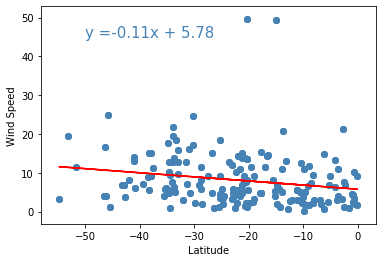

In [42]:
#Southern Lat vs. Wind Speed
south_windspeed = df.loc[df["Lat"] < 0, ["Lat", "Wind Speed"]]
x_values = south_windspeed["Lat"]
y_values = south_windspeed["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="steelblue")
plt.scatter(x_values,y_values, color="steelblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
